In [1]:
import json
import re
from ast import literal_eval

### Open json file with songs + albums + lyrics

In [2]:
with open('lyrics_taylor_swift.json') as f:
    lyrics_list = json.load(f)

### Add correct albums for songs with mislabeled albums

In [3]:
for song in lyrics_list:
    if song['song_title'] == 'you need to calm down ':
        song['album'] = 'lover'
    if song['song_title'] == 'lover ':
        song['album'] = 'lover'
    if song['song_title'] == 'blank space ':
        song['album'] = '1989 deluxe'
    if song['song_title'] == '...ready for it? ':
        song['album'] = 'reputation'
    if song['song_title'] == 'willow ':
        song['album'] = 'evermore'
    if song['song_title'] == 'cruel summer ':
        song['album'] = 'lover'
    if song['song_title'] == 'the archer ':
        song['album'] = 'lover'
    if song['song_title'] == 'untouchable ':
        song['album'] = 'fearless'
    if song['song_title'] == 'the man ':
        song['album'] = 'lover'
    if song['song_title'] == 'bad blood ':
        song['album'] = 'reputation'
    if song['song_title'] == 'miss americana & the heartbreak prince ':
        song['album'] = 'lover'
    if song['song_title'] == 'london boy ':
        song['album'] = 'lover'
    if song['song_title'] == 'cornelia street ':
        song['album'] = 'lover'
    if song['song_title'] == 'wildest dreams ':
        song['album'] = '1989 deluxe'
    if song['song_title'] == 'daylight ':
        song['album'] = 'lover'
    if song['song_title'] == 'death by a thousand cuts ':
        song['album'] = 'lover'
    if song['song_title'] == 'i forgot that you existed ':
        song['album'] = 'lover'
    if song['song_title'] == 'paper rings ':
        song['album'] = 'lover'
    if song['song_title'] == 'false god ':
        song['album'] = 'lover'
    if song['song_title'] == 'i think he knows ':
        song['album'] = 'lover'
    if song['song_title'] == 'afterglow ':
        song['album'] = 'lover'
    if song['song_title'] == "soon you'll get better ":
        song['album'] = 'lover'
    if song['song_title'] == 'shake it off ':
        song['album'] = '1989 deluxe'
    if song['song_title'] == 'its nice to have a friend ':
        song['album'] = 'lover'
    if song['song_title'] == 'everything has changed ':
        song['album'] = 'red deluxe edition'
    if song['song_title'] == 'mean ':
        song['album'] = 'speak now'
    if song['song_title'] == 'fifteen ':
        song['album'] = 'fearless'
    if song['song_title'] == 'sparks fly ':
        song['album'] = 'speak now'
    if song['song_title'] == 'picture to burn ':
        song['album'] = 'taylor swift'
    if song['song_title'] == 'the story of us ':
        song['album'] = 'speak now'
    if song['song_title'] == 'ours ':
        song['album'] = 'speak now'
    if song['song_title'] == 'tim mcgraw ':
        song['album'] = 'taylor swift'
    if song['song_title'] == 'cold as you ':
        song['album'] = 'taylor swift'
    if song['song_title'] == 'tied together with a smile ':
        song['album'] = 'taylor swift'
    if song['song_title'] == 'the other side of the door ':
        song['album'] = 'fearless'
    if song['song_title'] == 'jump then fall ':
        song['album'] = 'fearless'
    if song['song_title'] == 'if this was a movie ':
        song['album'] = 'speak now'
    if song['song_title'] == 'im only me when im with you ':
        song['album'] = 'taylor swift'
    if song['song_title'] == 'superstar ':
        song['album'] = 'fearless'
    if song['song_title'] == 'come in with the rain ':
        song['album'] = 'fearless'
    if song['song_title'] == 'superman ':
        song['album'] = 'speak now'
    if song['song_title'] == 'today was a fairytale ':
        song['album'] = 'fearless'

### Delete unnecessary elements

In [4]:
albums = ["taylor swift", "fearless", "speak now", "red deluxe edition", "1989 deluxe", "reputation", "lover", "folklore", "evermore"]

for song in lyrics_list:
    if song['album'] not in albums:
        lyrics_list.remove(song)

In [5]:
for song in lyrics_list:
    if song['album'] == 'unknown':
        lyrics_list.remove(song)

### Create dictionary with songs and albums

In [6]:
albums = ["taylor swift", "fearless", "speak now", "red deluxe edition", "1989 deluxe", "reputation", "lover", "folklore", "evermore"]
song_album_dic = {}
for song in lyrics_list:
    if song['album'] in albums:
        song_album_dic[song['song_title'].strip()] = song['album']
    else:
        pass

### Create dictionary with songs and lyrics

In [7]:
lyrics_dict = {}

for song in lyrics_list:
    lyrics_dict[song['song_title'].strip()] = song['lyrics']

### Define function to split camelCase lyric string

In [8]:
def split_camelcase(lyric):
    return re.findall(r'[A-Z]?[a-z]+|[A-Z]+(?=[A-Z]|$)', lyric)

### Run function to split camelCase lyric strings

In [9]:
for song, lyrics in lyrics_dict.items():
    new_lyrics = []
    lyric = [lyric.replace(lyric, str(split_camelcase(lyric))) for lyric in lyrics]
    new_lyrics.extend(lyric)
    lyrics_dict[song] = new_lyrics

### Remove double quotation marks

In [10]:
for song, lyrics in lyrics_dict.items():
    new_lyrics = []
    for lyric in lyrics:
        lyric = literal_eval(lyric)
        new_lyrics.append(lyric)
        lyrics_dict[song] = new_lyrics

### Merge individual word lists to create one list for each song

In [11]:
for song, lyrics in lyrics_dict.items():
    new_lyrics = []
    for lyric in lyrics:
        for word in lyric:
            new_lyrics.append(word)
            lyrics_dict[song] = new_lyrics

### Save new json file

In [12]:
with open("song_lyrics_dict.json", 'w') as f:
        json.dump(lyrics_dict, f, indent=4)

## Import tools for sentiment analysis

In [13]:
import pandas as pd
from nltk.tokenize.treebank import TreebankWordDetokenizer
from helpers import *
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

### Detokenize lyrics

In [14]:
corpus = {}
for song, lyrics in lyrics_dict.items():
    detokenized_lyrics = TreebankWordDetokenizer().detokenize(lyrics)
#     print(detokenized_lyrics)
    corpus[song] = [detokenized_lyrics.lower()]
# print(corpus)

### Create dataframe

In [15]:
df = pd.DataFrame(data=corpus).T.rename(columns={0: "lyrics"})

In [16]:
df

,lyrics
cardigan,vintage tee brand new phone high heels on cobb...
exile,i can see you standing honey with his arms aro...
lover,we could leave the christmas lights up til jan...
the 1,m doing good m on some new shit been saying ye...
look what you made me do,i don t like your little games don t like your...
...,...
perfect have i loved,if you love me then i love you swear by the fr...
matches,i shined your shoes i poured the wine i gave y...
check out this view,i dont need a lot but there s one thing love h...
sunshine,i walk in the room there s a beautiful sunshin...


### Find unique words in lyrics

In [17]:
def find_unique(list_of_words):
    unique_list = []
    for word in list_of_words:
        if word not in unique_list:
            unique_list.append(word)
    return unique_list

In [18]:
words = []
for word in df['lyrics'].tolist():
    words.append(find_unique(lyrics_to_words(word).split()))

### Add column of unique words to dataframe

In [19]:
df['words'] = words
df

,lyrics,words
cardigan,vintage tee brand new phone high heels on cobb...,"[vintage, tee, brand, new, phone, high, heel, ..."
exile,i can see you standing honey with his arms aro...,"[see, standing, honey, arm, around, body, laug..."
lover,we could leave the christmas lights up til jan...,"[could, leave, christmas, light, til, january,..."
the 1,m doing good m on some new shit been saying ye...,"[good, new, shit, saying, yes, instead, though..."
look what you made me do,i don t like your little games don t like your...,"[like, little, game, tilted, stage, role, made..."
...,...,...
perfect have i loved,if you love me then i love you swear by the fr...,"[love, swear, freckle, moon, maybe, enough, li..."
matches,i shined your shoes i poured the wine i gave y...,"[shined, shoe, poured, wine, gave, time, patch..."
check out this view,i dont need a lot but there s one thing love h...,"[dont, need, lot, one, thing, love, taught, ne..."
sunshine,i walk in the room there s a beautiful sunshin...,"[walk, room, beautiful, sunshine, ray, across,..."


### Add album column to dataframe

In [20]:
df['album'] = [song_album_dic[song_name] if song_name in song_album_dic else "Other" for song_name in df.index]
df

,lyrics,words,album
cardigan,vintage tee brand new phone high heels on cobb...,"[vintage, tee, brand, new, phone, high, heel, ...",folklore
exile,i can see you standing honey with his arms aro...,"[see, standing, honey, arm, around, body, laug...",folklore
lover,we could leave the christmas lights up til jan...,"[could, leave, christmas, light, til, january,...",lover
the 1,m doing good m on some new shit been saying ye...,"[good, new, shit, saying, yes, instead, though...",folklore
look what you made me do,i don t like your little games don t like your...,"[like, little, game, tilted, stage, role, made...",reputation
...,...,...,...
perfect have i loved,if you love me then i love you swear by the fr...,"[love, swear, freckle, moon, maybe, enough, li...",Other
matches,i shined your shoes i poured the wine i gave y...,"[shined, shoe, poured, wine, gave, time, patch...",Other
check out this view,i dont need a lot but there s one thing love h...,"[dont, need, lot, one, thing, love, taught, ne...",Other
sunshine,i walk in the room there s a beautiful sunshin...,"[walk, room, beautiful, sunshine, ray, across,...",Other


### Delete unnecessary rows from dataframe and reset index

In [21]:
indices_to_delete = df[df['album'] == 'Other'].index
df.drop(indices_to_delete, inplace = True)

In [22]:
df.to_csv('new_lyrics_words_albums.csv')

In [23]:
indexed_df = df.reset_index()
indexed_df

,index,lyrics,words,album
0,cardigan,vintage tee brand new phone high heels on cobb...,"[vintage, tee, brand, new, phone, high, heel, ...",folklore
1,exile,i can see you standing honey with his arms aro...,"[see, standing, honey, arm, around, body, laug...",folklore
2,lover,we could leave the christmas lights up til jan...,"[could, leave, christmas, light, til, january,...",lover
3,the 1,m doing good m on some new shit been saying ye...,"[good, new, shit, saying, yes, instead, though...",folklore
4,look what you made me do,i don t like your little games don t like your...,"[like, little, game, tilted, stage, role, made...",reputation
...,...,...,...,...
162,taylor swift's reputation (reputation tour intro),taylor swift taylor swift taylor swift taylor ...,"[taylor, swift, declined, address, rumor, glob...",taylor swift
163,long live/new year's day,i said remember this moment in the back of my ...,"[said, remember, moment, back, mind, time, sto...",taylor swift
164,i did something bad (reputation tour remix),i never trust a narcissist oh but they love me...,"[never, trust, narcissist, oh, love, play, em,...",taylor swift
165,state of grace (acoustic version),m walking fast through the traffic lights busy...,"[walking, fast, traffic, light, busy, street, ...",red deluxe edition


In [24]:
indexed_df.drop([119, 131, 132, 142, 148, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166], inplace = True)

In [25]:
indexed_df

,index,lyrics,words,album
0,cardigan,vintage tee brand new phone high heels on cobb...,"[vintage, tee, brand, new, phone, high, heel, ...",folklore
1,exile,i can see you standing honey with his arms aro...,"[see, standing, honey, arm, around, body, laug...",folklore
2,lover,we could leave the christmas lights up til jan...,"[could, leave, christmas, light, til, january,...",lover
3,the 1,m doing good m on some new shit been saying ye...,"[good, new, shit, saying, yes, instead, though...",folklore
4,look what you made me do,i don t like your little games don t like your...,"[like, little, game, tilted, stage, role, made...",reputation
...,...,...,...,...
149,invisible,she can t see the way your eyes light up when ...,"[see, way, eye, light, smile, never, notice, s...",taylor swift
150,a place in this world,i don t know what i want so don t ask me cause...,"[know, want, ask, cause, still, trying, figure...",taylor swift
151,superman,tall dark and superman he puts papers in his b...,"[tall, dark, superman, put, paper, briefcase, ...",speak now
152,a perfectly good heart,why would you wanna break a perfectly good hea...,"[would, wanna, break, perfectly, good, heart, ...",taylor swift


In [26]:
indexed_df.reset_index(drop = True, inplace = True)

In [27]:
indexed_df

,index,lyrics,words,album
0,cardigan,vintage tee brand new phone high heels on cobb...,"[vintage, tee, brand, new, phone, high, heel, ...",folklore
1,exile,i can see you standing honey with his arms aro...,"[see, standing, honey, arm, around, body, laug...",folklore
2,lover,we could leave the christmas lights up til jan...,"[could, leave, christmas, light, til, january,...",lover
3,the 1,m doing good m on some new shit been saying ye...,"[good, new, shit, saying, yes, instead, though...",folklore
4,look what you made me do,i don t like your little games don t like your...,"[like, little, game, tilted, stage, role, made...",reputation
...,...,...,...,...
144,invisible,she can t see the way your eyes light up when ...,"[see, way, eye, light, smile, never, notice, s...",taylor swift
145,a place in this world,i don t know what i want so don t ask me cause...,"[know, want, ask, cause, still, trying, figure...",taylor swift
146,superman,tall dark and superman he puts papers in his b...,"[tall, dark, superman, put, paper, briefcase, ...",speak now
147,a perfectly good heart,why would you wanna break a perfectly good hea...,"[would, wanna, break, perfectly, good, heart, ...",taylor swift


### Create dataframe of all words in lyrics with counts by album

In [28]:
set_words = []
set_albums = []

for i in indexed_df.index:
    for word in indexed_df['words'].iloc[i]:
        set_words.append(word)
        set_albums.append(indexed_df['album'].iloc[i])

In [29]:
words_albums_df = pd.DataFrame({'words': set_words, 'album': set_albums})

In [30]:
stopwords = ["di", "n't", "oh", "ooh", "ai", "oooh", "wo", "mmmm", "mmmmmmm", "lyrics", "chorus", "written", "taylor", "repeat", "s", "ta", "la", "ve", "ll", "wan", "na", "ca", "re", "d", "m", "gon", "ah"]

In [31]:
cv = CountVectorizer(stop_words=stopwords)

In [32]:
text_cv = cv.fit_transform(words_albums_df['words'].iloc[:])
data_cv = pd.DataFrame(text_cv.toarray(),columns=cv.get_feature_names())
data_cv['album'] = words_albums_df['album']

In [33]:
vect_words = data_cv.groupby('album').sum().T
vect_words = vect_words.reset_index(level=0).rename(columns ={'index':'words'})
vect_words = vect_words.rename_axis(columns='')

In [34]:
vect_words = vect_words[['words', "taylor swift", "fearless", "speak now", "red deluxe edition", "1989 deluxe", "reputation", "lover", "folklore", "evermore"]]

In [35]:
vect_words

,words,taylor swift,fearless,speak now,red deluxe edition,1989 deluxe,reputation,lover,folklore,evermore
0,abigail,0,1,0,0,0,0,0,0,0
1,absentmindedly,0,1,0,0,0,0,0,0,0
2,absurd,0,0,1,0,0,0,0,0,0
3,accent,0,0,0,0,0,0,1,0,0
4,accident,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
2818,yououttherestanding,0,0,0,0,0,0,0,0,1
2819,youre,0,0,0,3,0,1,1,0,0
2820,yourhands,0,0,0,0,0,0,1,0,0
2821,yousure,0,0,0,0,0,0,0,1,0


In [36]:
vect_words.to_csv('new_words_albums.csv',index=False)

### Calculate ratios for words/lyrics/songs/albums, and create dataframe by album

In [37]:
def calc_words_stats(df,main_df):
    unique_words = []
    total_words = []
    total_songs = []
    albums = []
    
    for value in df.columns[1:]:
        unique_words.append(np.count_nonzero(df[value]))
        total_words.append(sum(df[value]))
        albums.append(str(value))
        total_songs.append(main_df['album'][main_df['album']==value].count())
    
    data = pd.DataFrame({'album':albums,'unique words':unique_words,'total words':total_words,'total songs':total_songs})
    data['words per songs'] = round(data['total words'] / data['total songs'],0)
    data['words per songs'] = data['words per songs'].astype('int')
    return data

In [38]:
words_stats = calc_words_stats(vect_words,indexed_df)

In [39]:
words_stats

,album,unique words,total words,total songs,words per songs
0,taylor swift,483,873,14,62
1,fearless,678,1411,19,74
2,speak now,809,1532,17,90
3,red deluxe edition,732,1371,19,72
4,1989 deluxe,625,1068,15,71
5,reputation,767,1280,16,80
6,lover,835,1393,18,77
7,folklore,895,1299,16,81
8,evermore,845,1288,15,86


In [40]:
words_stats.to_csv('new_words_stats.csv')

### Calculate sentiment metrics for lyrics, and create dataframe of scores by song

In [41]:
negative = []
neutral = []
positive = []
compound = []

sid = SentimentIntensityAnalyzer()

In [42]:
for i in indexed_df.index:
    scores = sid.polarity_scores(indexed_df['lyrics'].iloc[i])
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])

In [43]:
indexed_df['negative'] = negative
indexed_df['neutral'] = neutral
indexed_df['positive'] = positive
indexed_df['compound'] = compound

In [44]:
indexed_df

,index,lyrics,words,album,negative,neutral,positive,compound
0,cardigan,vintage tee brand new phone high heels on cobb...,"[vintage, tee, brand, new, phone, high, heel, ...",folklore,0.061,0.746,0.194,0.9942
1,exile,i can see you standing honey with his arms aro...,"[see, standing, honey, arm, around, body, laug...",folklore,0.080,0.798,0.122,0.9321
2,lover,we could leave the christmas lights up til jan...,"[could, leave, christmas, light, til, january,...",lover,0.036,0.737,0.227,0.9961
3,the 1,m doing good m on some new shit been saying ye...,"[good, new, shit, saying, yes, instead, though...",folklore,0.072,0.755,0.173,0.9889
4,look what you made me do,i don t like your little games don t like your...,"[like, little, game, tilted, stage, role, made...",reputation,0.083,0.778,0.139,0.9820
...,...,...,...,...,...,...,...,...
144,invisible,she can t see the way your eyes light up when ...,"[see, way, eye, light, smile, never, notice, s...",taylor swift,0.071,0.699,0.230,0.9926
145,a place in this world,i don t know what i want so don t ask me cause...,"[know, want, ask, cause, still, trying, figure...",taylor swift,0.084,0.781,0.134,0.9091
146,superman,tall dark and superman he puts papers in his b...,"[tall, dark, superman, put, paper, briefcase, ...",speak now,0.057,0.752,0.191,0.9962
147,a perfectly good heart,why would you wanna break a perfectly good hea...,"[would, wanna, break, perfectly, good, heart, ...",taylor swift,0.006,0.712,0.282,0.9978


In [45]:
indexed_df.to_csv('new_indexed_df.csv')

### Create dataframe of mean sentiment scores by album

In [46]:
means_df = indexed_df.groupby(['album']).mean()
means_df

,negative,neutral,positive,compound
album,,,,
1989 deluxe,0.109467,0.701600,0.188867,0.531393
evermore,0.132533,0.715333,0.152267,0.203673
fearless,0.065895,0.766842,0.167211,0.677200
folklore,0.108438,0.759313,0.132375,0.283987
lover,0.104944,0.695667,0.199500,0.633728
red deluxe edition,0.083211,0.740737,0.176105,0.701105
reputation,0.086313,0.749188,0.164563,0.725894
speak now,0.086529,0.766000,0.147471,0.418335
taylor swift,0.079429,0.765214,0.155357,0.464893


### Create plot comparing mean sentiment scores by album

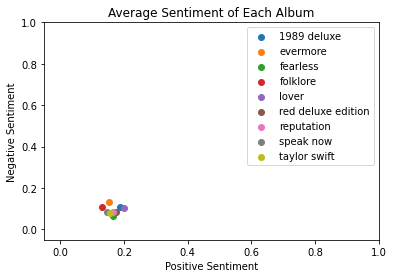

In [47]:
for name, group in means_df.groupby('album'):
    plt.scatter(group['positive'],group['negative'], label=name)
    plt.legend()

plt.xlim([-0.05,1.0])
plt.ylim([-0.05,1.0])
plt.title("Average Sentiment of Each Album")
plt.xlabel('Positive Sentiment')
plt.ylabel('Negative Sentiment')

plt.savefig("album_sentiments.png",format="png", bbox_inches='tight')
plt.show()